In [ ]:
!pip install --upgrade pip
!pip install fosforml numpy pandas matplotlib scikit-learn seaborn python-dateutil
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15
!pip install fosforml 
!pip install fosforio
!pip install refractio
!pip install refractml

In [ ]:
!pip install seaborn scipy xgboost pandas dice-ml tabulate numpy scikit-learn pandas-profiling plotly matplotlib scipy statsmodels seaborn pydantic-settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from scipy.stats.mstats import winsorize
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib
from fosforml import *
from fosforml.constants import MLModelFlavours
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
from refractio import snowflake
snowflake.get_connection(connection_name="Final hr attrition data")

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.
Exception occurred in getting snowflake connection: 'connectionSources'


In [3]:
df = snowflake.get_dataframe("Final_HR_Attrition_Data")
df

,SALARY,SENIORITY,TENURE_MONTHS,MONTHS_AFTER_COLLEGE,BIRTH_YEAR,AGE,MAPPED_ROLE_CLEAN,SEX,ETHNICITY,HOSPITAL_TYPE,...,OVER_TIME_HOURS,CHURN,BUSINESS_TRAVEL,ENVIRONMENT_SATISFACTION,JOB_SATISFACTION,MARTIAL_STATUS,PERCENTAGE_SALARY_HIKE,PERFORMANCE_RATING,RELATIONSHIP_SATISFACTION,WORK_LIFE_BALANCE
0,31657.073,1,13,161,1986,38,occupational,F,Black,Psychiatric,...,7,True,Travel_Rarely,High,Medium,Married,18,Excellent,Medium,Better
1,82697.324,2,10,72,1988,36,social,M,API,Acute Care - Department of Defense,...,6,False,Travel_Rarely,High,Very High,Married,19,Excellent,Low,Good
2,67291.312,1,65,7,1986,38,nurse,M,Black,Acute Care - Department of Defense,...,9,False,Non-Travel,High,Low,Married,14,Excellent,Very High,Bad
3,41186.945,1,36,33,1988,36,technologist,F,Hispanic,Psychiatric,...,8,False,Travel_Rarely,Low,Very High,Divorced,21,Low,Medium,Bad
4,54826.128,2,9,23,1990,34,physician,M,Black,Childrens,...,11,True,Travel_Rarely,High,Very High,Single,16,Good,High,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,97520.177,5,45,113,1969,55,physician,M,Hispanic,Acute Care Hospitals,...,1,False,Travel_Rarely,High,High,Divorced,20,Outstanding,Low,Best
299996,55666.168,2,32,5,1987,37,emt,M,White,Childrens,...,9,True,Travel_Rarely,Medium,Low,Married,23,Low,Very High,Best
299997,49866.716,2,34,4,1986,38,physician,F,White,Childrens,...,0,True,Travel_Rarely,Medium,Medium,Single,14,Excellent,Medium,Bad
299998,77706.113,2,6,26,1996,28,physician,F,API,Childrens,...,1,False,Travel_Rarely,High,High,Single,11,Good,Very High,Good


In [4]:
print(df.isnull().sum())

SALARY                           0
SENIORITY                        0
TENURE_MONTHS                    0
MONTHS_AFTER_COLLEGE             0
BIRTH_YEAR                       0
AGE                              0
MAPPED_ROLE_CLEAN                0
SEX                              0
ETHNICITY                        0
HOSPITAL_TYPE                    0
HOSPITAL_OWNERSHIP               0
COMPANY_NAME                     0
CITY                             0
STATE                            0
DISTANCE                         0
DEGREE_CLEAN                     0
SCHOOL_END_DATE                  0
JOB_START_DATE                   0
JOB_END_DATE                 90102
USER_ID                          0
OVER_TIME_HOURS                  0
CHURN                            0
BUSINESS_TRAVEL                  0
ENVIRONMENT_SATISFACTION         0
JOB_SATISFACTION                 0
MARTIAL_STATUS                   0
PERCENTAGE_SALARY_HIKE           0
PERFORMANCE_RATING               0
RELATIONSHIP_SATISFA

In [5]:
df = df.dropna()

In [6]:
print(df.isnull().sum())

SALARY                       0
SENIORITY                    0
TENURE_MONTHS                0
MONTHS_AFTER_COLLEGE         0
BIRTH_YEAR                   0
AGE                          0
MAPPED_ROLE_CLEAN            0
SEX                          0
ETHNICITY                    0
HOSPITAL_TYPE                0
HOSPITAL_OWNERSHIP           0
COMPANY_NAME                 0
CITY                         0
STATE                        0
DISTANCE                     0
DEGREE_CLEAN                 0
SCHOOL_END_DATE              0
JOB_START_DATE               0
JOB_END_DATE                 0
USER_ID                      0
OVER_TIME_HOURS              0
CHURN                        0
BUSINESS_TRAVEL              0
ENVIRONMENT_SATISFACTION     0
JOB_SATISFACTION             0
MARTIAL_STATUS               0
PERCENTAGE_SALARY_HIKE       0
PERFORMANCE_RATING           0
RELATIONSHIP_SATISFACTION    0
WORK_LIFE_BALANCE            0
dtype: int64


In [7]:
df = df.drop(["USER_ID", "JOB_START_DATE", "JOB_END_DATE", "SCHOOL_END_DATE"], axis = 1)

In [8]:
CATEGORICAL_COLUMNS = ["MAPPED_ROLE_CLEAN","SEX", "ETHNICITY","HOSPITAL_TYPE", "HOSPITAL_OWNERSHIP","COMPANY_NAME","CITY","STATE","DISTANCE", 
                       "DEGREE_CLEAN","BUSINESS_TRAVEL","ENVIRONMENT_SATISFACTION","JOB_SATISFACTION","MARTIAL_STATUS","PERFORMANCE_RATING","RELATIONSHIP_SATISFACTION","WORK_LIFE_BALANCE"]
NUMERICAL_COLUMNS = ["SALARY", "SENIORITY", "TENURE_MONTHS", "MONTHS_AFTER_COLLEGE", "BIRTH_YEAR","AGE", "OVER_TIME_HOURS", "PERCENTAGE_SALARY_HIKE",]
LABEL_COLUMNS = ["CHURN"]
OUTPUT_COLUMNS = ["PREDICTION"]

In [9]:
# Filter feature columns
feature_columns = CATEGORICAL_COLUMNS + NUMERICAL_COLUMNS
feature_columns = [col for col in feature_columns if col in df.columns]
LABEL_COLUMNS = [col for col in LABEL_COLUMNS if col in df.columns]
 
# Split data into features and labels
X = df[feature_columns]
y = df[LABEL_COLUMNS].values.ravel()  # Flatten to 1D array for consistency

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
 
# Define transformers
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)
 
numerical_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler(clip=True)
)
 
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, CATEGORICAL_COLUMNS),
        ('num', numerical_transformer, NUMERICAL_COLUMNS)
    ]
)
 
# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

In [15]:
pipeline.fit(X_train, y_train)

result = pipeline.predict(X_test)

In [16]:
result

array([0, 1, 1, ..., 1, 1, 1])

In [17]:
from joblib import dump, load
filename = "HR_Attrition_ml_model_Analysis.joblib"
dump(pipeline, filename)

['HR_Attrition_ml_model_Analysis.joblib']

In [18]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

In [19]:
from refractml import *

from refractml.constants import MLModelFlavours

/tmp/pip_packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


In [20]:
@scoring_func
def score(model, request):
    payload_dict = request.json["payload"]
    data_json = eval(payload)
    data = pd.DataFrame([data_json])
    prediction = str(model.predict(data)[0])
    return prediction

In [21]:
import requests
payload = str(X_test.iloc[123].to_dict())
req = requests.Request()
req.json = {"payload": payload}

print(score(pipeline, req))

1


In [22]:
req.json

{'payload': "{'MAPPED_ROLE_CLEAN': 'occupational', 'SEX': 'M', 'ETHNICITY': 'White', 'HOSPITAL_TYPE': 'Childrens', 'HOSPITAL_OWNERSHIP': 'Physician', 'COMPANY_NAME': 'Johnson & Johnson', 'CITY': 'Morgantown', 'STATE': 'WV', 'DISTANCE': '>10 Miles', 'DEGREE_CLEAN': 'Masters Degree', 'BUSINESS_TRAVEL': 'Travel_Rarely', 'ENVIRONMENT_SATISFACTION': 'Low', 'JOB_SATISFACTION': 'Low', 'MARTIAL_STATUS': 'Divorced', 'PERFORMANCE_RATING': 'Excellent', 'RELATIONSHIP_SATISFACTION': 'Medium', 'WORK_LIFE_BALANCE': 'Better', 'SALARY': 63456.001, 'SENIORITY': 3, 'TENURE_MONTHS': 14, 'MONTHS_AFTER_COLLEGE': 51, 'BIRTH_YEAR': 1989, 'AGE': 35, 'OVER_TIME_HOURS': 3, 'PERCENTAGE_SALARY_HIKE': 19}"}

In [25]:
## registering the model in refract.
tmp = register_model(pipeline, 
               score, 
               name="HR_Attrition_ml_model", 
               description="Final_HR_Attrition_model_trained_using _ml",
               flavour=MLModelFlavours.sklearn,
               model_type="classification",
               init_script="\\n pip install fosforml \\n pip install seaborn \\n pip install snowflake-connector-python[pandas] \\n pip install joblib==1.3.2 scikit-learn=1.3.2",
               y_true=y_test,
               y_pred=y_pred, 
               features=X_train.columns,
               labels=[0,1],
               input_type="json", 
               explain_ai=True,
               prob=y_prob,
               x_train=X_train, 
               x_test=X_test, 
               y_train=y_train,
               y_test=y_test,
               feature_names=X_train.columns.tolist(),
               original_features=X_train.columns.tolist(),
               feature_ids=X_train.columns,
               target_names=['NOT LEFT','LEFT'],
               kyd=True, kyd_score = True)


Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


In [26]:
payload  = {"payload": X_test.iloc[0].to_dict()}
payload

{'payload': {'MAPPED_ROLE_CLEAN': 'occupational',
  'SEX': 'M',
  'ETHNICITY': 'API',
  'HOSPITAL_TYPE': 'Acute Care - Department of Defense',
  'HOSPITAL_OWNERSHIP': 'Voluntary non-profit - Other',
  'COMPANY_NAME': 'Encompass Health Corp.',
  'CITY': 'Texarkana',
  'STATE': 'TX',
  'DISTANCE': '5-10 Miles',
  'DEGREE_CLEAN': 'Associates Degree',
  'BUSINESS_TRAVEL': 'Travel_Rarely',
  'ENVIRONMENT_SATISFACTION': 'Very High',
  'JOB_SATISFACTION': 'High',
  'MARTIAL_STATUS': 'Married',
  'PERFORMANCE_RATING': 'Low',
  'RELATIONSHIP_SATISFACTION': 'High',
  'WORK_LIFE_BALANCE': 'Bad',
  'SALARY': 50805.547,
  'SENIORITY': 2,
  'TENURE_MONTHS': 26,
  'MONTHS_AFTER_COLLEGE': 105,
  'BIRTH_YEAR': 1981,
  'AGE': 43,
  'OVER_TIME_HOURS': 3,
  'PERCENTAGE_SALARY_HIKE': 21}}

In [29]:
headers={"Content-type":"application/json"}
url = "http://svc-4053cae7-6cef-4af9-8bb9-dbee8dec31c3:5001/hrattritionmlmodel/576dde3f-edb7-42d6-9913-b61743e4ee2a/score"
data={"payload": payload}
response = requests.post(url, json=data, headers=headers) 
response.json()

{'data': '1', 'request_id': '601a40aa-718e-4d67-8e28-6cea05b34ded'}

In [30]:
result = pipeline.predict(X_test)
result_prob = pipeline.predict_proba(X_test)
pred_df = X_test.copy()
result = result
result_prob = result_prob
pred_df["PREDICTION"] = result
pred_df["PROB"] = result_prob[:, 1]

In [31]:
from sklearn.metrics import classification_report, log_loss, roc_auc_score
 
# Check lengths
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))
 
# Print classification report
print(classification_report(y_test, y_pred))
 
# Calculate accuracy
accuracy = sum(y_test == y_pred) / len(y_test)
print("Accuracy:", accuracy)
 
# Calculate additional metrics
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob[:, 1])  # Assuming class 1 is the positive class
 
print("Log Loss:", log_loss_value)
print("ROC AUC Score:", roc_auc)

Length of y_test: 41980
Length of y_pred: 41980
              precision    recall  f1-score   support

       False       0.51      0.50      0.50     21205
        True       0.50      0.50      0.50     20775

    accuracy                           0.50     41980
   macro avg       0.50      0.50      0.50     41980
weighted avg       0.50      0.50      0.50     41980

Accuracy: 0.5002382086707956
Log Loss: 0.7003753569904368
ROC AUC Score: 0.5026587989402631


In [32]:
log_loss(y_test,pred_df["PROB"] )

0.7003753569904368

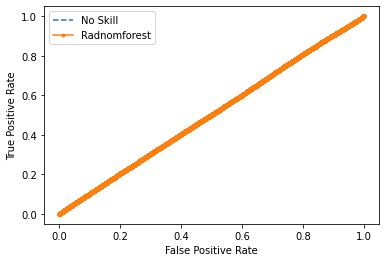

In [33]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, pred_df["PROB"])
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_df["PROB"])
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Radnomforest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

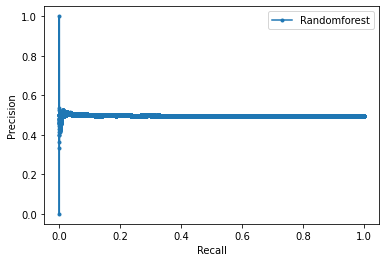

In [34]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pred_df["PROB"])
plt.plot(lr_recall, lr_precision, marker='.', label='Randomforest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Not Churn','Churn'],
            yticklabels=['Not CHurn','Churn'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()